# Requisitos:
 
 FFMpeg en el OS: "winget install FFMpeg"
 
 ipympl #Jupyter Interactive Widget Framework extension

In [29]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install ipython
!pip install ipywidgets

In [30]:
import numpy as np
from scipy.integrate import solve_ivp

In [31]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from IPython import display #Con ipymbl no funciona
#REEMPLAZO CON:
#from IPython.display import display, HTML
#import cufflinks as cf
#from IPython.display import clear_output, Image, display, HTML

#cf.set_config_file(sharing='public',theme='white',offline=True)

In [32]:
# assign constants (g, ell) values
g = 9.81
ell = 1

# initial conditions: theta=30 deg, velocity=0
theta0 = np.deg2rad(30)
theta_dot0 = 0

# our system of differential equations
# y[0] is theta, y[1] is theta_dot
def pendulum_ODE(t, y): 
    return (y[1], -g*np.sin(y[0])/ell)

# solve the ODE, 30 fps
sol = solve_ivp(pendulum_ODE, [0, 5], (theta0, theta_dot0), 
    t_eval=np.linspace(0,5,30*5))

# output of the solver
theta, theta_dot = sol.y
t = sol.t

# convert from radians to degrees
theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

# optional: save theta_deg in a CSV file
np.savetxt('pend.csv', np.transpose([t, theta_deg, theta_dot_deg]), delimiter=',')

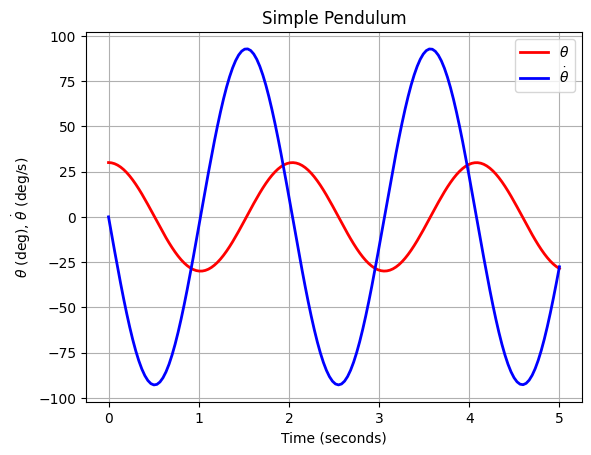

In [33]:
# Mathplotlib create a plot of theta and theta_dot vs time
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()
plt.show()

In [34]:
# animate theta, theta_dot vs time
fig, ax = plt.subplots() #En Plotly go.Figure() ax no existe

theta_curve, = ax.plot(t[0], theta_deg[0], 'r') #theta_curve = go.Scatter(x=[t[0]], y=[theta_deg[0]], mode='lines', line=dict(color='red'))
theta_dot_curve, = ax.plot(t[0], theta_dot_deg[0], 'b') #theta_curve = go.Scatter(x=[t[0]], y=[theta_deg[0]], mode='lines', line=dict(color='blue'))

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time') #fig.update_layout(title='Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, 5) #fig.update_layout(xaxis=dict(range=[0, 5]))
ax.set_ylim(-100, 100) #fig.update_layout(yaxis=dict(range=[-100, 100]))
ax.set_xlabel('Time (seconds)') #fig.update_xaxes(title_text='Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)') #fig.update_yaxes(title_text=r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax.legend([r'$\theta$', r'$\dot \theta$']) #theta_trace.update(showlegend=True) Y theta_dot_trace.update(showlegend=True)
ax.grid() #fig.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'), yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'))

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

# save video @ 30 fps
anim = animation.FuncAnimation(fig, animate, frames=len(t))
#ffmpeg_writer = animation.FFMpegWriter(fps=30)
#anim.save('time_domain.mp4', writer=ffmpeg_writer)
video_domain = anim.to_html5_video()
html = display.HTML(video_domain)
display.display(html)
plt.close()
# you need to make sure the ffmpeg is installed on your machine and 
# the path is configured correctly. see Troubleshooting for details

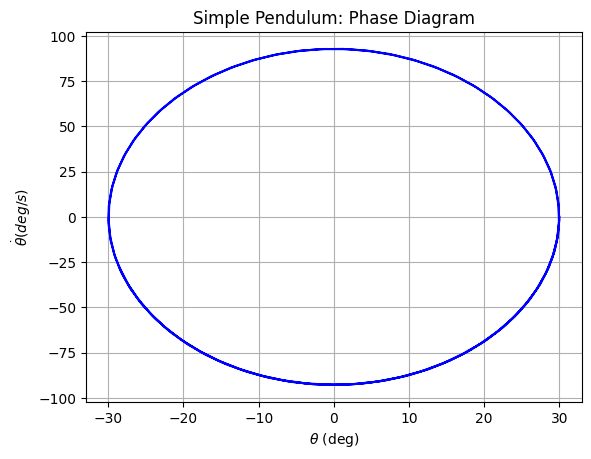

In [35]:
# create a phase diagram of theta, theta_dot
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta (deg/s)$')
plt.grid()
plt.show()

In [36]:
# animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, =  ax.plot(theta_deg[0], theta_dot_deg[0], 'ro')

ax.set_title('Simple Pendulum: Phase Diagram')
ax.set_xlim(-35, 35)
ax.set_ylim(-100, 100)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$\dot \theta$ (deg/s)')
ax.grid()

def animate(i):
    phase_curve.set_data([theta_deg[:i+1]], [theta_dot_deg[:i+1]])
    phase_dot.set_data([theta_deg[i]], [theta_dot_deg[i]])

anim = animation.FuncAnimation(fig, animate, frames=len(t))
#ffmpeg_writer = animation.FFMpegWriter(fps=30)
#ani.save('phase_diagram.mp4', writer=ffmpeg_writer)
video_phase_diagram = anim.to_html5_video()
html = display.HTML(video_phase_diagram)
display.display(html)
plt.close()

In [37]:
# create an animation of the pendulum swining with Matplotlib
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 0.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))

# animate each frame "i"
def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([[0, x]], [[0, y]])
    circle.set_center((x, y))

# save a video: 30 fps
anim = animation.FuncAnimation(fig, animate, frames=len(t))
#ffmpeg_writer = animation.FFMpegWriter(fps=30)
#anim.save('pend.mp4', writer=ffmpeg_writer)
video_pend = anim.to_html5_video()
html = display.HTML(video_pend)
display.display(html)
plt.close()

In [ ]:
# animate everything together!
fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])

# theta, theta_dot vs time
ax0 = fig.add_subplot(gs[0,0])
ax0.set_xlim(0, 5)
ax0.set_ylim(-100, 100)
ax0.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax0.legend([r'$\theta$', r'$\dot \theta$'])
ax0.grid()

theta_curve, = ax0.plot(t[0], theta_deg[0], 'b')
theta_dot_curve, = ax0.plot(t[0], theta_dot_deg[0], 'r')

# phase diagram
ax1 = fig.add_subplot(gs[1,0])
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)
ax1.set_xlabel(r'$\theta$ (deg)')
ax1.set_ylabel(r'$\dot \theta$ (deg/s)')
ax1.grid()

phase_curve, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, =  ax1.plot(theta_deg[0], theta_dot_deg[0], 'ro')

# pendulum
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

ax2 = fig.add_subplot(gs[:,1])
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1.5, 0.5)

# draw the pendulum
x0, y0 = pend_pos(theta0)
line, = ax2.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax2.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))


def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

    phase_curve.set_data([theta_deg[:i+1]], [theta_dot_deg[:i+1]])
    phase_dot.set_data(([theta_deg[i]], [theta_dot_deg[i]]))

    x, y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
#ffmpeg_writer = animation.FFMpegWriter(fps=30)
#ani.save('all.mp4', writer=ffmpeg_writer)
video_all = ani.to_html5_video()
html = display.HTML(video_all)
display.display(html)
plt.close()